<a href="https://colab.research.google.com/github/RodrigoAroeira/IPC/blob/master/C%C3%B3pia_de_ipc_tp_2023_1%5Benunciado%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-requisitos

In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install googledrivedownloader

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(
    file_id="1-unqG82ZwQT8c2auQT9CFP0D1z5R1v41",
    dest_path="./data/nba.zip",
    unzip=True)

def le_dataset(arquivo, colunas_pt):
    df = pd.read_csv(arquivo, header=0, usecols=colunas_pt.keys())
    return df.rename(columns=colunas_pt)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Unzipping...Done.




---


# Tarefa 1. Visão Geral dos Conjuntos de Dados



In [19]:
colunas_pt = {
    "SEASON": "Ano",
    "GAME_ID": "ID Jogo",
    "TEAM_ID_home": "ID T1",
    "PTS_home": "Pontos T1",
    "TEAM_ID_away": "ID T2",
    "PTS_away": "Pontos T2"
}

jogos_df = le_dataset("data/games.csv", colunas_pt)
jogos_df = jogos_df.query("Ano != 2022")
jogos_df

,ID Jogo,Ano,ID T1,Pontos T1,ID T2,Pontos T2
542,42100406,2021,1610612738,90.0,1610612744,103.0
543,42100405,2021,1610612744,104.0,1610612738,94.0
544,42100404,2021,1610612738,97.0,1610612744,107.0
545,42100403,2021,1610612738,116.0,1610612744,100.0
546,42100402,2021,1610612744,107.0,1610612738,88.0
...,...,...,...,...,...,...
26646,11400007,2014,1610612737,93.0,1610612740,87.0
26647,11400004,2014,1610612741,81.0,1610612764,85.0
26648,11400005,2014,1610612747,98.0,1610612743,95.0
26649,11400002,2014,1610612761,99.0,1610612758,94.0


## a. Qual a quantidade mínima, máxima e média de pontos por jogo?

Sua tarefa: Defina uma nova coluna "Total Pontos" como sendo a soma de "Pontos T1" e "Pontos T2"

Saída esperada:

```
min      69.000000
max     329.000000
mean    203.649289
```

In [21]:
# Altere esta linha, para criar a coluna conforme solicitado:
# jogos_df["Total Pontos"] = ?
jogos_df["Total Pontos"] = jogos_df["Pontos T1"] + jogos_df["Pontos T2"]
jogos_df["Total Pontos"].describe().loc[["min", "max", "mean"]]

min      69.000000
max     329.000000
mean    203.649289
Name: Total Pontos, dtype: float64

## b. Quem venceu mais ao longo das temporadas, o time da casa (time 1) ou o time visitante (time 2)?

Sua tarefa:

i.   Defina uma nova coluna "Vencedor" que assume valor 1 (se o vencedor foi o time 1) ou 2 (se o vencedor foi o time 2).

**Dica:** comece definindo se o vencedor foi o time 1 (verdadeiro ou falso), converta a coluna para inteiro e some 1.

ii.   Mostre a quantidade de vitórias do time 1 e do time 2

**Dica:** agrupe os dados pela coluna "Vencedor" (groupby) e calcule o tamanho de cada grupo (size)

Saía esperada:

```
1    15326
2    10783
```

In [ ]:
# Seu código aqui
jogos_df["Vencedor"] = np.where(jogos_df["Pontos T1"] > jogos_df["Pontos T2"], 1, 2)
vitorias = jogos_df.groupby("Vencedor").size()
print(vitorias[1])
print(vitorias[2])

## c. Como a relação de vencedores (casa x visitante) variou ao longos das temporadas?

Sua tarefa:

Você deve produzir um gráficos de linhas mostrando a variação do número de vitórias dos times da case e dos times visitantes a cada temporada (duas linhas). Para isso, complete o código a seguir com o que está faltando:

i. Faça uma query em vencedores_ano para filtrar apenas os números referentes as vitórias dos times da casa (a cada ano). Armazene o resultado em uma variável `vitorias1_ano`.

ii. Faça o mesmo processo, mas desta vez filtrando os números referentes as vitórias dos times visitantes. Armazene em `vitorias2_ano`.

iii. Plot duas linhas no gráfico, uma para os números dos times da casa e outra para os números dos times visitantes.

Saída esperada:

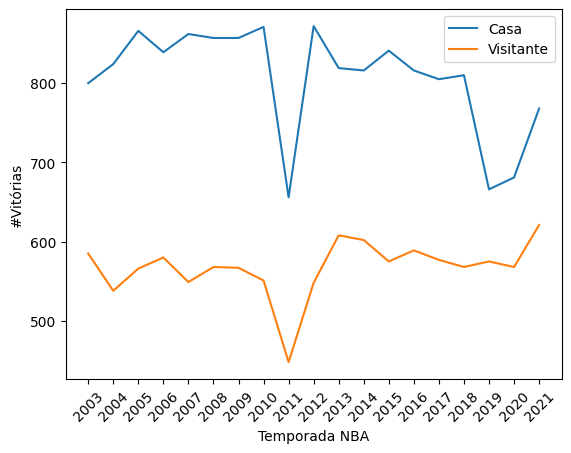

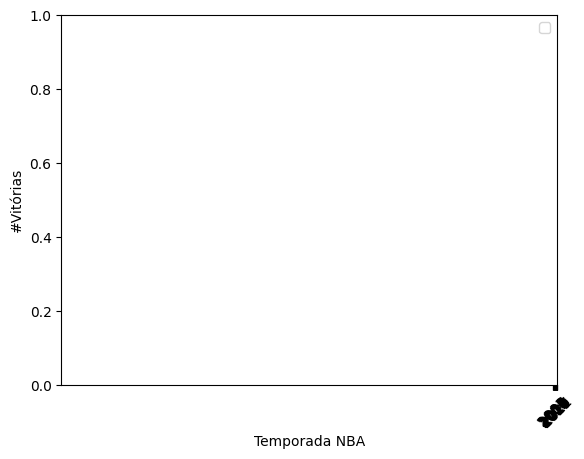

In [26]:
vencedores_ano = (jogos_df
        .groupby(["Ano", "Vencedor"])
        .size()
        .reset_index(name="#Vitórias"))

# Complete o código aqui:
# vitorias1_ano = ?
# vitorias2_ano = ?

anos_min, anos_max = jogos_df["Ano"].min(), jogos_df["Ano"].max()
anos = np.arange(anos_min, anos_max + 1, step=1)

# Complete o código aqui
# Plote a linha referente as vitorias do time da casa (time 1)
# Plote a linha referente as vitorias do time visitante (time 2)

plt.xticks(anos, rotation=45)
plt.xlabel("Temporada NBA")
plt.ylabel("#Vitórias")
plt.legend(["Casa", "Visitante"])
plt.show()

## d. Evolução das vitórias ao longo das temporadas (formato de barra)

Sua tarefa: repita o processo acima, mas desta vez mostrando a evolução das vitórias dos times da casa x visitante no formato de barras. Além disso, desta vez limite os dados apenas aos últimos 5 anos.

Saída esperada:

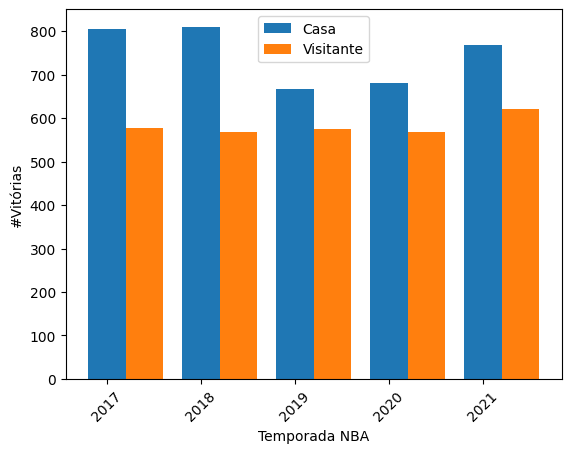

In [ ]:
# Seu código aqui



---


# Tarefa 2. Estatísticas de Jogadores

Esta tarefa será um pouco mais livre que a primeira. Escolha um jogador de sua preferência, e produza um (mini) relatório (com gráficos) sobre as estatísticas deste jogador:

a. Quantos pontos por temporada ele fez? \
b. Como ele se compara aos outros jogadores, ao longo das temporadas? (pontos, rebotes, arremessos de 3, lances livres...) \
c. Se você fosse ranquear os jogadores pela quantidade de pontos total, em que posição o jogador que você escolheu estaria? Produza um gráfico de barra horizontal mostrando o top 10 dos jogadores. Caso seu jogador não esteja entre o top 10, coloque-o como um 11º elemento do gráfico. \
d. Pense em alguma outra estatística interessante.

Você tem a disposição a seguinte tabela

In [ ]:
colunas_pt = {
    "TEAM_ID": "ID Time",
    "NICKNAME": "Time"
}

times_df = le_dataset("data/teams.csv", colunas_pt)

colunas_pt = {
    "GAME_ID": "ID Jogo",
    "TEAM_ID": "ID Time",
    "TEAM_CITY": "Cidade",
    "PLAYER_ID": "ID Jogador",
    "PLAYER_NAME": "Jogador",
    "PTS": "Pontos",
    "FG3M": "Pontos de 3",
    "FG3A": "Arremessos de 3",
    "FTM": "Pontos Livres",
    "FTA": "Lances Livres",
    "AST": "Assistências",
    "REB": "Rebotes",
    "BLK": "Tocos"
}

detalhes_df = jogos_df[["ID Jogo", "Ano"]].merge(
    times_df.merge(
        le_dataset("data/games_details.csv", colunas_pt),
        on="ID Time"),
    on="ID Jogo").dropna()

detalhes_df

,ID Jogo,Ano,ID Time,Time,Cidade,ID Jogador,Jogador,Pontos de 3,Arremessos de 3,Pontos Livres,Lances Livres,Rebotes,Assistências,Tocos,Pontos
0,42100406,2021,1610612738,Celtics,Boston,1628369,Jayson Tatum,1.0,4.0,0.0,0.0,3.0,7.0,1.0,13.0
1,42100406,2021,1610612738,Celtics,Boston,201143,Al Horford,4.0,5.0,3.0,3.0,14.0,2.0,1.0,19.0
2,42100406,2021,1610612738,Celtics,Boston,1629057,Robert Williams III,0.0,0.0,2.0,2.0,7.0,2.0,5.0,10.0
3,42100406,2021,1610612738,Celtics,Boston,1627759,Jaylen Brown,5.0,11.0,5.0,6.0,7.0,3.0,0.0,34.0
4,42100406,2021,1610612738,Celtics,Boston,203935,Marcus Smart,1.0,2.0,0.0,0.0,6.0,9.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654894,11400001,2014,1610612748,Heat,Miami,203920,Khem Birch,0.0,0.0,0.0,2.0,4.0,1.0,1.0,4.0
654895,11400001,2014,1610612748,Heat,Miami,204053,Shawn Jones,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0
654896,11400001,2014,1610612748,Heat,Miami,203894,Shabazz Napier,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0
654897,11400001,2014,1610612748,Heat,Miami,200769,Shannon Brown,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0
